In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
#mean_squared_error, median_absolute_error
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Salary_dataset.csv')

In [3]:
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
data.shape

(30, 3)

In [6]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [7]:
data.drop(columns='Unnamed: 0', inplace=True)
data

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [8]:
data.isnull().mean()

YearsExperience    0.0
Salary             0.0
dtype: float64

In [9]:
data.duplicated().sum()

0

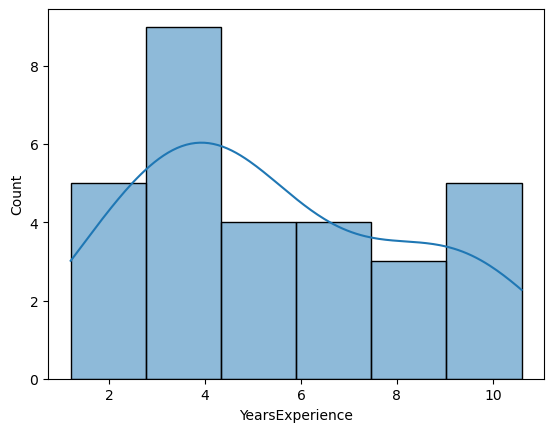

In [10]:
sns.histplot(data=data, x='YearsExperience', kde=True)
plt.show()

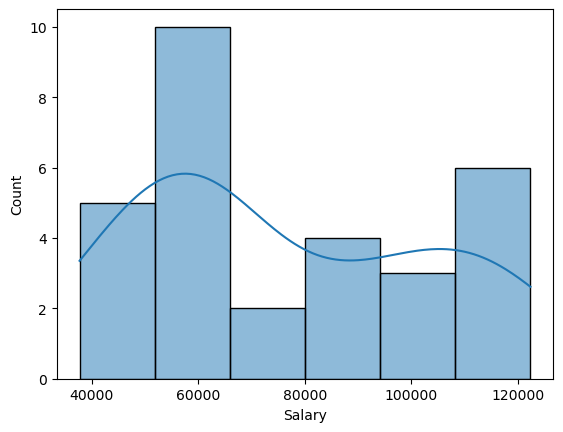

In [11]:
sns.histplot(data=data, x='Salary', kde=True)

plt.show()

In [12]:
#Box plots

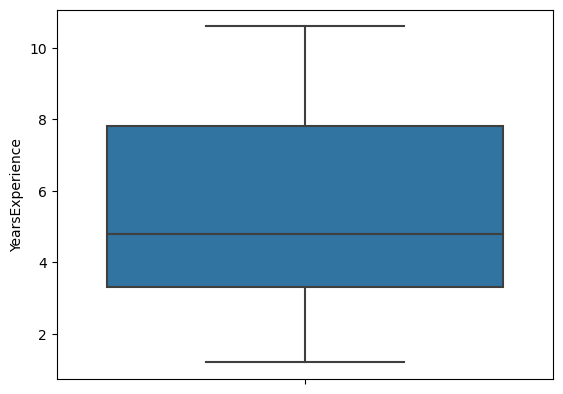

In [13]:
sns.boxplot(data=data, y='YearsExperience')

plt.show()

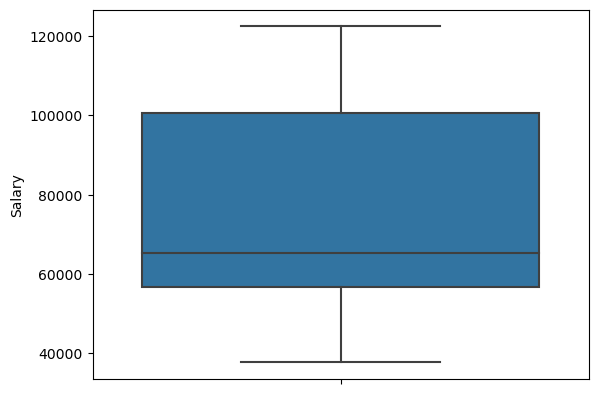

In [14]:
sns.boxplot(data=data, y='Salary')
plt.show()

In [15]:
#Checking the correlation between Target and Features

In [16]:
data.corr()['Salary']

YearsExperience    0.978242
Salary             1.000000
Name: Salary, dtype: float64

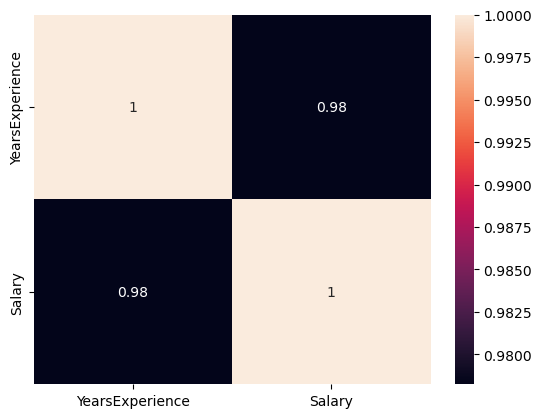

In [17]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [18]:
#Splitting the data into Features (x) and Target (y)

In [19]:
x = data[['YearsExperience']].values
y = data[['Salary']].values

In [20]:
x

array([[ 1.2],
       [ 1.4],
       [ 1.6],
       [ 2.1],
       [ 2.3],
       [ 3. ],
       [ 3.1],
       [ 3.3],
       [ 3.3],
       [ 3.8],
       [ 4. ],
       [ 4.1],
       [ 4.1],
       [ 4.2],
       [ 4.6],
       [ 5. ],
       [ 5.2],
       [ 5.4],
       [ 6. ],
       [ 6.1],
       [ 6.9],
       [ 7.2],
       [ 8. ],
       [ 8.3],
       [ 8.8],
       [ 9.1],
       [ 9.6],
       [ 9.7],
       [10.4],
       [10.6]])

In [21]:
y

array([[ 39344.],
       [ 46206.],
       [ 37732.],
       [ 43526.],
       [ 39892.],
       [ 56643.],
       [ 60151.],
       [ 54446.],
       [ 64446.],
       [ 57190.],
       [ 63219.],
       [ 55795.],
       [ 56958.],
       [ 57082.],
       [ 61112.],
       [ 67939.],
       [ 66030.],
       [ 83089.],
       [ 81364.],
       [ 93941.],
       [ 91739.],
       [ 98274.],
       [101303.],
       [113813.],
       [109432.],
       [105583.],
       [116970.],
       [112636.],
       [122392.],
       [121873.]])

In [22]:
#Standardising the features

In [23]:
sc = StandardScaler()

In [24]:
x = sc.fit_transform(x)

In [25]:
x

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [26]:
#Splitting the data into training and testing data

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True)
#(x,y, test_size=0.2, random_state=42, shuffle=True)

In [28]:
x_train.shape, x_test.shape

((24, 1), (6, 1))

In [29]:
y_train.shape, y_test.shape

((24, 1), (6, 1))

In [30]:
#Model bulding

In [31]:
model = LinearRegression()

In [32]:
#Model training

In [33]:
model.fit(x_train, y_train)

LinearRegression()

In [34]:
#Predicting y_pred

In [35]:
y_pred = model.predict(x_test)

In [36]:
#Evaluating the model

In [37]:
#Training score

In [38]:
model.score(x_train, y_train)*100

96.45401573418148

In [39]:
#Testing score

In [40]:
model.score(x_test, y_test)*100

90.24461774180497

In [41]:
#r2_score

In [42]:
r2_score(y_test, y_pred)*100

90.24461774180497

In [43]:
#MAE

In [44]:
mean_absolute_error(y_test, y_pred)

6286.453830757746

In [45]:
#MSE

In [46]:
mse = mean_squared_error(y_test, y_pred)
mse

49830096.85590834

In [47]:
#RMSE

In [48]:
np.sqrt(mse)

7059.043621901506

In [49]:
#Making a DataFrame using Actual Data And Prediction

In [50]:
OUTPUT = pd.DataFrame(zip(y_test, y_pred), columns=('ACTUAL', 'PREDICTION'), dtype=float)
#columns=('ACTUAL', 'PREDICTION'), dtype=float)

In [51]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,112636.0,115791.210113
1,67939.0,71499.278095
2,113813.0,102597.868661
3,83089.0,75268.804224
4,64446.0,55478.792045


In [52]:
#Plotting the results

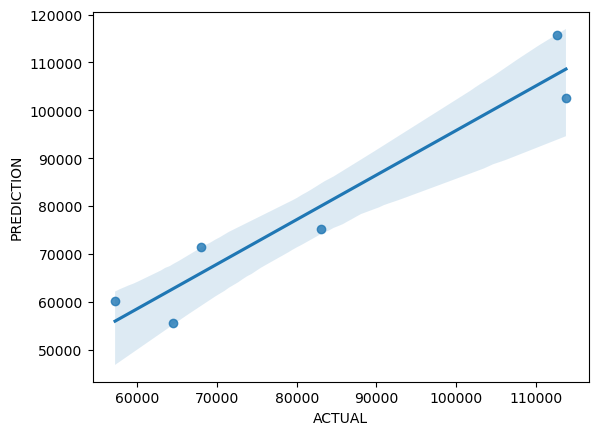

In [53]:
sns.regplot(data=OUTPUT, x = 'ACTUAL', y= 'PREDICTION')
plt.show()